In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# import note
notes = pd.read_parquet('notes.parquet', engine='auto')

In [3]:
users_no = len(notes['noteAuthorParticipantId'].unique())
print(f"Number of unique note authors: {users_no}")

first_note_date = \
    datetime.fromtimestamp(notes['createdAtMillis'].min()/1000).\
    strftime("%B %d, %Y")
last_note_date = \
    datetime.fromtimestamp(notes['createdAtMillis'].max()/1000).\
    strftime("%B %d, %Y")
print(f"The first note we have was created at {first_note_date} \
and the last one at {last_note_date}.")

Number of unique note authors: 213216
The first note we have was created at January 28, 2021 and the last one at December 12, 2024.


In [ ]:
# notes per month and year
notes.groupby(['createdAtYear', 'createdAtMonth'])['noteId'].count()

createdAtYear  createdAtMonth
2021           1                   1035
               2                   2037
               3                   1698
               4                   1271
               5                   1232
               6                   1303
               7                   1224
               8                   1819
               9                   2101
               10                  1948
               11                  1593
               12                  1312
2022           1                   1155
               2                   1022
               3                   1173
               4                   1132
               5                   1968
               6                   1884
               7                   1212
               8                   1142
               9                    910
               10                  1469
               11                  3964
               12                  3685
2023      

In [6]:
# notes per year
notes.groupby(['createdAtYear'])['noteId'].count()

createdAtYear
2021      18573
2022      20716
2023     392285
2024    1059558
Name: noteId, dtype: int64

In [11]:
# active authors per year
notes.groupby(['createdAtYear']).agg({'noteAuthorParticipantId': 'nunique'}).reset_index()


,createdAtYear,noteAuthorParticipantId
0,2021,3200
1,2022,3809
2,2023,67827
3,2024,182577


In [29]:
# new users per month
new_authors_monthly = notes.groupby('noteAuthorParticipantId').first()\
    .reset_index()\
    .groupby(['createdAtYear', 'createdAtMonth'])['noteId'].nunique()\
        .reset_index()
new_authors_monthly.rename(columns={'noteId': 'count'}, inplace=True)

In [27]:
# active users per month
active_authors_monthly = notes.groupby(['createdAtYear', 'createdAtMonth'])\
    .agg({'noteAuthorParticipantId': 'nunique'}).reset_index()
active_authors_monthly.rename(columns={'noteAuthorParticipantId': 'count'}, inplace=True)

In [30]:
active_authors_monthly

,createdAtYear,createdAtMonth,count
0,2021,1,400
1,2021,2,671
2,2021,3,597
3,2021,4,484
4,2021,5,344
5,2021,6,485
6,2021,7,462
7,2021,8,733
8,2021,9,869
9,2021,10,759


In [31]:
new_authors_monthly

,createdAtYear,createdAtMonth,count
0,2021,1,400
1,2021,2,451
2,2021,3,329
3,2021,4,170
4,2021,5,98
5,2021,6,175
6,2021,7,111
7,2021,8,369
8,2021,9,428
9,2021,10,318


To check if the community is alive because of new users or not, let's see new users vs active users per month.

In [38]:
notes['createdAtYM'] = notes['createdAt'].dt.to_period('M')


In [41]:
# new users per month
new_authors_monthly = notes.groupby('noteAuthorParticipantId').first()\
    .reset_index()\
    .groupby(['createdAtYM'])['noteId'].nunique()\
        .reset_index()
new_authors_monthly.rename(columns={'noteId': 'count'}, inplace=True)

In [42]:
# active users per month
active_authors_monthly = notes.groupby(['createdAtYM'])\
    .agg({'noteAuthorParticipantId': 'nunique'}).reset_index()
active_authors_monthly.rename(columns={'noteAuthorParticipantId': 'count'}, inplace=True)

<Axes: xlabel='createdAtYM', ylabel='count'>

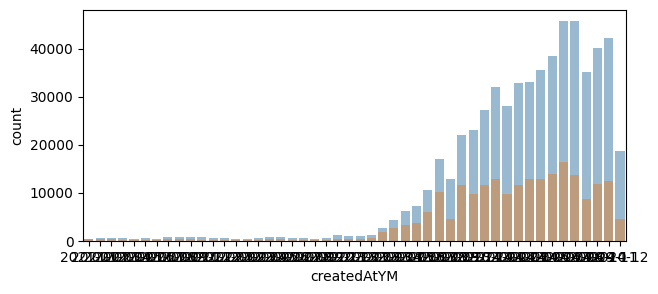

In [48]:
fig, ax = plt.subplots(1,1, figsize=(7,3))
sns.barplot(x="createdAtYM", y="count", data=active_authors_monthly, alpha=.5)
sns.barplot(x="createdAtYM", y="count", data=new_authors_monthly, alpha=.5)